##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Quickstart with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/python_quickstart"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Este início rápido demonstra como usar o Python SDK para a API Gemini, que dá acesso aos grandes modelos de linguagem Gemini do Google. Neste início rápido, você aprenderá como:

1. Configure seu ambiente de desenvolvimento e acesso à API para usar o Gemini.
2. Gere respostas de texto a partir de entradas de texto.
3. Gere respostas de texto a partir de entradas multimodais (texto e imagens).
4. Use o Gemini para conversas múltiplas (bate-papo).
5. Use incorporações para modelos de linguagem grandes.

## Pré-requisitos

Você pode executar este guia de início rápido no [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), que executa este notebook diretamente no navegador e não requer configuração adicional do ambiente.

Como alternativa, para concluir este início rápido localmente, certifique-se de que seu ambiente de desenvolvimento atenda aos seguintes requisitos:

- Python 3.9+
- Uma instalação do `jupyter` para rodar o notebook.

Antes de Começar, eu sou muito fã do Alok e aproveitando que hoje ele lançou esse álbum

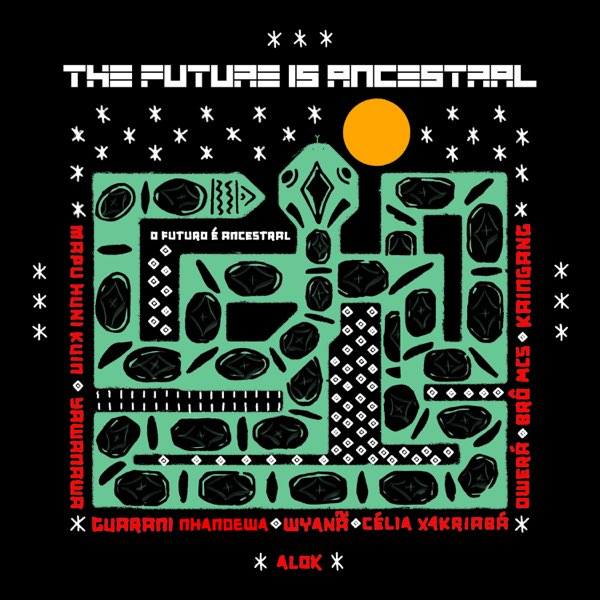

## Setup

### Instale o SDK do Python

O SDK Python para a API Gemini está contido no pacote [`google-generativeai`](https://pypi.org/project/google-generativeai/). Instale a dependência usando pip:

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 10.1 MB/s eta 0:00:00


### Importar pacotes

Importar os pacotes necessários.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

In [ ]:
from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Configure sua chave API

Antes de poder usar a API Gemini, você deve primeiro obter uma chave de API. Se ainda não tiver uma, crie uma chave com um clique no Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Obtenha uma chave de API</a>

No Colab, adicione a chave do gerenciador de segredos em “🔑” no painel esquerdo. Dê a ele o nome `GOOGLE_API_KEY`.

Depois de obter a chave da API, passe-a para o SDK. Você pode fazer isso de duas maneiras:

* Coloque a chave na variável de ambiente `GOOGLE_API_KEY` (o SDK irá buscá-la automaticamente a partir daí).
* Passe a chave para `genai.configure(api_key=...)`

In [ ]:
import os
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## Listar modelos

Agora você está pronto para chamar a API Gemini. Use `list_models` para ver os modelos Gemini disponíveis:

* `gemini-pro`: otimizado para prompts somente de texto.
* `gemini-pro-vision`: otimizado para prompts de texto e imagens.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Observação: para obter informações detalhadas sobre os modelos disponíveis, incluindo recursos e limites de taxa, consulte [Modelos Gemini](https://ai.google.dev/models/gemini). Existem opções para solicitar [aumentos de limite de taxa](https://ai.google.dev/docs/increase_quota). O limite de taxa para modelos Gemini-Pro é de 60 solicitações por minuto (RPM).

O pacote `genai` também suporta a família de modelos PaLM, mas apenas os modelos Gemini suportam os recursos genéricos e multimodais do método `generateContent`.

## Gere texto a partir de entradas de texto

Para prompts somente de texto, use o modelo `gemini-pro`:

In [ ]:
model = genai.GenerativeModel('models/gemini-1.5-pro-latest')

O método `generate_content` pode lidar com vários casos de uso, incluindo chat multiturno e entrada multimodal, dependendo do que o modelo subjacente suporta. Os modelos disponíveis suportam apenas texto e imagens como entrada e texto como saída.

No caso mais simples, você pode passar uma string de prompt para <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code </a> método:

In [ ]:
response = model.generate_content("quem são os povos originários do Brasil?")
response.text

Em casos simples, o acessador `response.text` é tudo que você precisa. Para exibir texto Markdown formatado, use a função `to_markdown`:

In [ ]:
to_markdown(response.text)

> ## Os Povos Originários do Brasil: Uma Rica Tapeçaria de Culturas
> 
> O Brasil, antes da chegada dos europeus, era habitado por uma grande diversidade de povos indígenas, cada um com sua cultura, língua e modo de vida únicos.  Estima-se que existiam entre 2 e 5 milhões de indígenas no território que hoje conhecemos como Brasil, divididos em mais de mil povos distintos.
> 
> Infelizmente, a colonização europeia trouxe consigo violência, doenças e deslocamento para esses povos, resultando em uma drástica redução da população indígena. No entanto, apesar dos desafios enfrentados ao longo dos séculos, muitos grupos indígenas sobreviveram e continuam a lutar pela preservação de suas culturas e territórios. 
> 
> **Alguns dos povos indígenas mais conhecidos do Brasil incluem:**
> 
> * **Guarani:** Um dos maiores grupos indígenas do Brasil, presente em várias regiões, principalmente no sul e sudeste. São conhecidos por sua resistência cultural e sua luta pela demarcação de terras.
> * **Ticuna:** O povo indígena mais numeroso da Amazônia brasileira, habitando a região do Alto Solimões. Possuem uma rica cultura material e espiritual, com destaque para suas artes plumárias e sua relação com a floresta.
> * **Yanomami:** Habitam a região da Serra Parima, na fronteira entre Brasil e Venezuela.  Vivem em harmonia com a natureza e possuem um profundo conhecimento da floresta. Enfrentam atualmente grandes desafios devido ao garimpo ilegal em suas terras.
> * **Xavante:** Localizados principalmente no estado de Mato Grosso, são conhecidos por sua cultura guerreira e suas elaboradas pinturas corporais.
> * **Pataxó:** Habitam o sul da Bahia e são reconhecidos por sua luta pela recuperação de suas terras e pela preservação de suas tradições.
> 
> **É importante lembrar que esta lista representa apenas uma pequena fração da diversidade dos povos indígenas brasileiros.** Cada grupo possui sua própria história, cultura e desafios, e é fundamental respeitar e valorizar essa riqueza cultural.
> 
> **Para conhecer mais sobre os povos indígenas do Brasil, você pode consultar:**
> 
> * **Instituto Socioambiental (ISA):** https://www.socioambiental.org/
> * **Fundação Nacional do Índio (Funai):** https://www.funai.gov.br/
> * **Museu do Índio:** http://www.museudoindio.gov.br/
> 
> Lembre-se, a luta dos povos indígenas pela preservação de suas culturas e territórios é uma luta de todos nós! 


Se a API não conseguiu retornar um resultado, use `GenerateContentRespose.prompt_feedback` para ver se ela foi bloqueada devido a questões de segurança em relação ao prompt.

In [ ]:
response.prompt_feedback

Gemini pode gerar múltiplas respostas possíveis para um único prompt. Essas possíveis respostas são chamadas de `candidatos` e você pode revisá-las para selecionar a mais adequada como resposta.

Visualize os candidatos de resposta com <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [ ]:
response.candidates

[content {
  parts {
    text: "## Os Povos Origin\303\241rios do Brasil: Uma Rica Tape\303\247aria de Culturas\n\nO Brasil, antes da chegada dos europeus, era habitado por uma grande diversidade de povos ind\303\255genas, cada um com sua cultura, l\303\255ngua e modo de vida \303\272nicos.  Estima-se que existiam entre 2 e 5 milh\303\265es de ind\303\255genas no territ\303\263rio que hoje conhecemos como Brasil, divididos em mais de mil povos distintos.\n\nInfelizmente, a coloniza\303\247\303\243o europeia trouxe consigo viol\303\252ncia, doen\303\247as e deslocamento para esses povos, resultando em uma dr\303\241stica redu\303\247\303\243o da popula\303\247\303\243o ind\303\255gena. No entanto, apesar dos desafios enfrentados ao longo dos s\303\251culos, muitos grupos ind\303\255genas sobreviveram e continuam a lutar pela preserva\303\247\303\243o de suas culturas e territ\303\263rios. \n\n**Alguns dos povos ind\303\255genas mais conhecidos do Brasil incluem:**\n\n* **Guarani:** Um d

Obs.: Por padrão, o modelo retorna uma resposta após concluir todo o processo de geração. Você também pode transmitir a resposta à medida que ela é gerada, e o modelo retornará partes da resposta assim que forem geradas.

Para transmitir respostas, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</ código></a>.

## Gere texto a partir de entradas de imagem e texto

Gemini fornece um modelo multimodal (`gemini-pro-vision`) que aceita texto, imagens e entradas. A API `GenerativeModel.generate_content` foi projetada para lidar com prompts multimodais e retornar uma saída de texto.

Vamos incluir uma imagem:

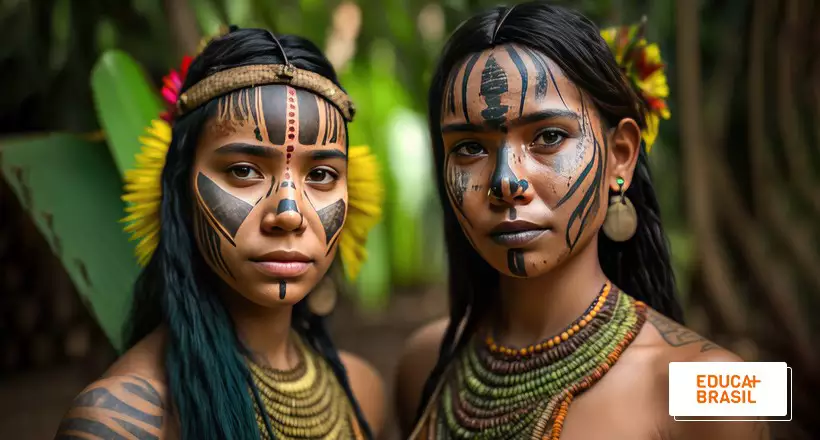

In [ ]:
import PIL.Image

img = PIL.Image.open('/content/indigenas.png')
img

Use o modelo `gemini-pro-vision` e passe a imagem para o modelo com `generate_content`.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

Para fornecer texto e imagens em um prompt, passe uma lista contendo as strings e imagens:

In [ ]:
response = model.generate_content([("Escreva uma texto de blog curta e envolvente com base nesta imagem." +
                                    "Deve incluir uma descrição sobre a importância do dia dos povos indigenas no Brasil, "+
                                    "e a defesa de seus direitos básicos"),
                                   img])
to_markdown(response.text)

>  O Dia dos Povos Indígenas é comemorado no Brasil em 19 de abril. A data foi escolhida em homenagem ao Primeiro Congresso Indígena Interamericano, realizado em 1940 no México. O objetivo do congresso era discutir os direitos dos povos indígenas e promover a sua cultura e identidade.
> 
> No Brasil, os povos indígenas representam cerca de 0,5% da população, mas são responsáveis pela proteção de mais de 13% do território nacional. As terras indígenas são essenciais para a preservação da biodiversidade e dos recursos naturais do país. Além disso, os povos indígenas têm um papel fundamental na manutenção da cultura e da identidade brasileiras.
> 
> Apesar da importância dos povos indígenas para o Brasil, eles ainda enfrentam muitos desafios. A discriminação, a violência e a pobreza são alguns dos problemas que afetam essas comunidades. Além disso, os povos indígenas estão constantemente ameaçados pela perda de suas terras e de seus recursos naturais.
> 
> O Dia dos Povos Indígenas é uma oportunidade para celebrar a cultura e a identidade dos povos indígenas, e também para refletir sobre os desafios que eles enfrentam. É importante que todos os brasileiros se unam na luta pelos direitos dos povos indígenas e pela garantia de que eles possam viver com dignidade e respeito.
> 
> Aqui estão algumas ações que você pode tomar para ajudar os povos indígenas:
> 
> * Apoie organizações que trabalham com os povos indígenas.
> * Doe para causas indígenas.
> * Eduque-se sobre a cultura e a história dos povos indígenas.
> * Fale sobre os direitos dos povos indígenas com seus amigos e familiares.
> * Denuncie casos de discriminação e violência contra os povos indígenas.
> 
> Juntos, podemos fazer a diferença na vida dos povos indígenas.

## Conversas de bate-papo

Gemini permite que você tenha conversas livres em vários turnos. A classe `ChatSession` simplifica o processo gerenciando o estado da conversa, portanto, diferentemente de `generate_content`, você não precisa armazenar o histórico da conversa como uma lista.

Inicialize o bate-papo:

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

Nota: O modelo de visão `gemini-pro-vision` não é otimizado para chat multiturno.

O método `ChatSession.send_message` retorna o mesmo tipo `GenerateContentResponse` que <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content< /código></a>. Ele também anexa sua mensagem e a resposta ao histórico de bate-papo:

In [ ]:
response = chat.send_message("Em uma sentença, explique quem descobriu o Brasil para uma criança.")
to_markdown(response.text)

> Pedro Álvares Cabral, um navegador português, foi quem primeiro chegou ao Brasil em 1500.

In [ ]:
chat.history

[parts {
   text: "Em uma senten\303\247a, explique quem descobriu o Brasil para uma crian\303\247a."
 }
 role: "user",
 parts {
   text: "Pedro \303\201lvares Cabral, um navegador portugu\303\252s, foi quem primeiro chegou ao Brasil em 1500."
 }
 role: "model"]

Você pode continuar enviando mensagens para continuar a conversa. Use o argumento `stream=True` para transmitir o chat:

In [ ]:
response = chat.send_message("Se havia povos indígenas em Pindorama (nome originário do Brasil) antes da chegada de Pedro Alvares Cabral, como você explica quem descobriu o Brasil?")
to_markdown(response.text)

> Quando os navegadores portugueses chegaram ao Brasil em 1500, eles encontraram uma terra já habitada por povos indígenas. Portanto, é mais correto dizer que **Pedro Álvares Cabral** **avistou** ou **chegou** ao Brasil, em vez de **descobrir** o Brasil no sentido de ser o primeiro a encontrá-lo.
> 
> No entanto, a chegada dos portugueses marcou o início do processo de colonização europeia do Brasil, que teve um profundo impacto sobre os povos indígenas e o meio ambiente. Por isso, muitas vezes se considera a chegada de Cabral como o "descobrimento" do Brasil do ponto de vista dos europeus.
> 
> É importante lembrar que os povos indígenas já tinham seus próprios nomes para a terra que habitavam, incluindo "Pindorama". O nome "Brasil" foi dado pelos portugueses devido à abundância de árvores de pau-brasil na costa.

Os objetos `glm.Content` contêm uma lista de objetos `glm.Part`, cada um contendo um texto (string) ou inline_data (`glm.Blob`), onde um blob contém dados binários e um `mime_type`. O histórico de bate-papo está disponível como uma lista de objetos `glm.Content` em `ChatSession.history`:

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: Em uma sentença, explique quem descobriu o Brasil para uma criança.

> **model**: Pedro Álvares Cabral, um navegador português, foi quem primeiro chegou ao Brasil em 1500.

> **user**: Se havia povos indígenas em Pindorama (nome originário do Brasil) antes da chegada de Pedro Alvares Cabral, como você explica quem descobriu o Brasil?

> **model**: Quando os navegadores portugueses chegaram ao Brasil em 1500, eles encontraram uma terra já habitada por povos indígenas. Portanto, é mais correto dizer que **Pedro Álvares Cabral** **avistou** ou **chegou** ao Brasil, em vez de **descobrir** o Brasil no sentido de ser o primeiro a encontrá-lo.
> 
> No entanto, a chegada dos portugueses marcou o início do processo de colonização europeia do Brasil, que teve um profundo impacto sobre os povos indígenas e o meio ambiente. Por isso, muitas vezes se considera a chegada de Cabral como o "descobrimento" do Brasil do ponto de vista dos europeus.
> 
> É importante lembrar que os povos indígenas já tinham seus próprios nomes para a terra que habitavam, incluindo "Pindorama". O nome "Brasil" foi dado pelos portugueses devido à abundância de árvores de pau-brasil na costa.

## Contar tokens

Modelos de LLM têm uma janela de contexto, e o comprimento do contexto geralmente é medido em termos do **número de tokens**. Com a API Gemini, você pode determinar o número de tokens por qualquer objeto `glm.Content`. No caso mais simples, você pode passar uma string de consulta para o método `GenerativeModel.count_tokens` da seguinte maneira:

In [ ]:
model.count_tokens("quem são os povos originários do Brasil?")

Da mesma forma, você pode verificar `token_count` para sua `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

## Utilizar dados privados

In [ ]:
model = genai.GenerativeModel('gemini-pro')

document = pathlib.Path('document.txt').read_text()

result = model.generate_content(f"""
  Explain how deep-sea life survives.

  Please answer based on the following document:
  {document}""")


## Chamada de funções

In [ ]:
def minus(a: float, b: float):
    """Returns a - b."""
    return a-b

model = genai.GenerativeModel(
    model_name='gemini-1.0-pro',
    tools=[minus])

chat = model.start_chat(
    enable_automatic_function_calling=True)

response = chat.send_message(
    'Estamos no ano de 2024 e o Brasil foi avistado em 1500, '
    'Quanto tempo faz isso?')

#Podiamos chamar funções de APIs externas e etc

chat.history

[parts {
   text: "Estamos no ano de 2024 e o Brasil foi avistado em 1500, Quanto tempo faz isso?"
 }
 role: "user",
 parts {
   function_call {
     name: "multiply"
     args {
       fields {
         key: "a"
         value {
           number_value: 2024.0
         }
       }
       fields {
         key: "b"
         value {
           number_value: 1500.0
         }
       }
     }
   }
 }
 role: "model",
 parts {
   function_response {
     name: "multiply"
     response {
       fields {
         key: "result"
         value {
           number_value: 524.0
         }
       }
     }
   }
 }
 role: "user",
 parts {
   text: "524 anos"
 }
 role: "model"]

## Qual é o próximo

- Design de prompt é o processo de criação de prompts que extraem a resposta desejada dos modelos de linguagem. Escrever prompts bem estruturados é uma parte essencial para garantir respostas precisas e de alta qualidade de um modelo de linguagem. Saiba mais sobre as práticas recomendadas para [redação de prompts](https://ai.google.dev/docs/prompt_best_practices).
- Gemini oferece diversas variações de modelo para atender às necessidades de diferentes casos de uso, como tipos e complexidade de entrada, implementações para bate-papo ou outras tarefas de linguagem de diálogo e restrições de tamanho. Saiba mais sobre os [modelos Gemini](https://ai.google.dev/models/gemini) disponíveis.
- Gemini oferece opções para solicitar [aumentos de limite de taxa](https://ai.google.dev/docs/increase_quota). O limite de taxa para modelos Gemini-Pro é de 15** solicitações por minuto (RPM).